# Does familiarity with the victim lead to lighter sentencing for sexual offenders?

**Date** : March, 2025

**Author** : Nina Lavault

## 1 - Library import 

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx
from matplotlib.patches import Patch
from IPython.display import display, Math

## 2 - Directed Acyclic Graph 

/var/folders/z2/k0n7z7h15sv83l04rzjy9m3w0000gn/T/ipykernel_91491/242159643.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


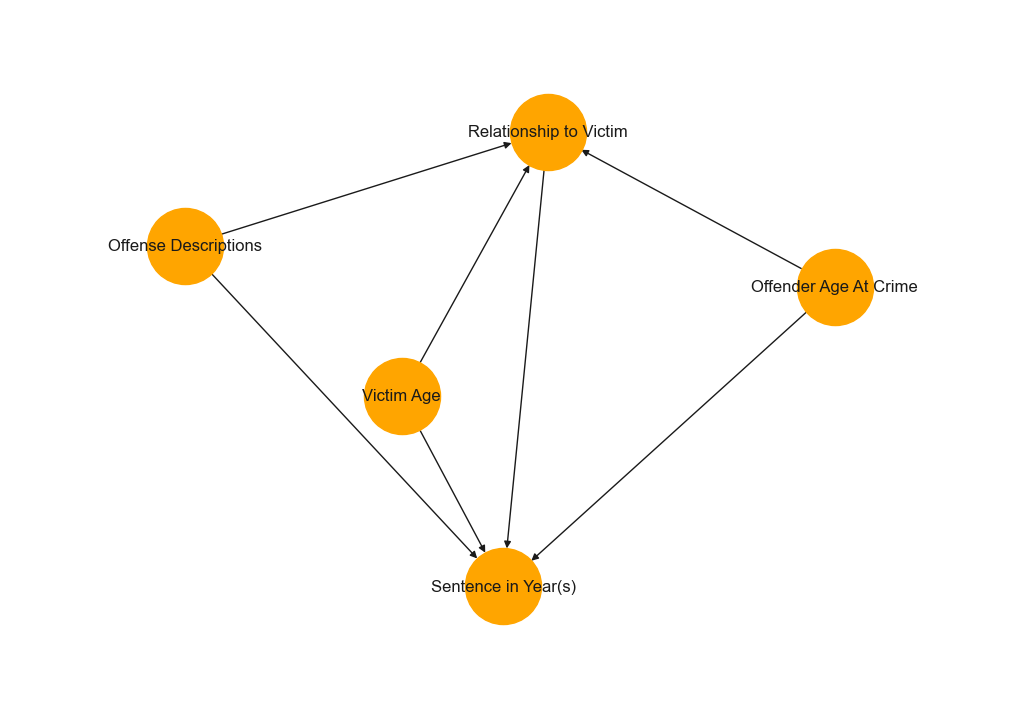

In [120]:
G = nx.DiGraph()
G.add_edges_from([
    ('Relationship to Victim', 'Sentence in Year(s)'),
    ('Victim Age', 'Relationship to Victim'),
    ('Victim Age', 'Sentence in Year(s)'),
    ('Offender Age At Crime', 'Relationship to Victim'),
    ('Offender Age At Crime', 'Sentence in Year(s)'), ('Offense Descriptions', 'Relationship to Victim'), ('Offense Descriptions', 'Sentence in Year(s)')
])

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='orange', arrows=True)
plt.margins(0.2)
plt.tight_layout()
plt.show()



## 3 - Data Import 

In [122]:
pd.set_option("display.max_column", None)
df = pd.read_csv("offenders_data.csv", delimiter=";")
display(df)

,Sex,Date of Crime,Offense Descriptions,Relationship to Victim,Offender Age at Crime,Victim Sex,Victim Age,Sentence in Year(s)
0,Male,"Aug. 24, 1993",Actual Sexual Contact,None Reported,17,Female,4 Years,5.0
1,Male,"Jan. 1, 2006",Actual Sexual Intercourse,Non-Stranger,16,Male,9 Years,3.0
2,Male,"June 1, 2010",Actual Sexual Intercourse,Non-Stranger,32,Female,14 Years,7.0
3,Male,"Nov. 8, 2014",Actual Sexual Contact,None Reported,38,Female,11 Years,7.0
4,Male,"Nov. 29, 2005",Attempted Sexual Intercourse,Stranger,31,Female,31 Years,10.0
...,...,...,...,...,...,...,...,...
505,Male,"Feb. 1, 1991",Actual Sexual Contact,Non-Stranger,27,Female,6 Years,5.0
506,Male,"May 1, 2007",Actual Sexual Contact,Non-Stranger,30,Female,12 Years,2.0
507,Male,"Dec. 26, 2012",Actual Sexual Intercourse,Non-Stranger,19,Female,12 Years,3.5
508,Male,"Jan. 1, 2009",Actual Sexual Intercourse,Non-Stranger,44,Female,9 Years,3.0


## 4 - Data Manipulation

In [123]:
import pandas as pd

df = pd.read_csv("offenders_data.csv", delimiter=";")

# Extract the numeric part of the "Victim Age" column and convert to float
df["Victim Age"] = df["Victim Age"].str.extract(r"(\d+)").astype(float)

# Filter only selected relationships
df_filtered = df[df["Relationship to Victim"].isin(["Stranger", "Non-Stranger", "None Reported"])].copy()

# Abbreviate offense descriptions
df_filtered["Offense Abbrev"] = df_filtered["Offense Descriptions"].replace({
    'Actual Sexual Contact': 'SC',
    'Attempted Sexual Contact': 'AC',
    'Actual Sexual Intercourse': 'SI',
    'Attempted Sexual Intercourse': 'AI',
    'Actual Deviate Sexual Intercourse': 'DI',
    'Actual,Promoting/Possessing Sexual Performance by a Child': 'PP',
    'Actual,MoreThanOnce Promoting/Possessing Sexual Performance by a Child': 'RP',
    'Attempted,Promoting/Possessing Sexual Performance by a Child': 'AP'
})

# Remove unwanted offense types
df_filtered = df_filtered[~df_filtered["Relationship to Victim"].isin(["None Reported"])]

display(df_filtered)


,Sex,Date of Crime,Offense Descriptions,Relationship to Victim,Offender Age at Crime,Victim Sex,Victim Age,Sentence in Year(s),Offense Abbrev
1,Male,"Jan. 1, 2006",Actual Sexual Intercourse,Non-Stranger,16,Male,9.0,3.0,SI
2,Male,"June 1, 2010",Actual Sexual Intercourse,Non-Stranger,32,Female,14.0,7.0,SI
4,Male,"Nov. 29, 2005",Attempted Sexual Intercourse,Stranger,31,Female,31.0,10.0,AI
5,Male,"June 7, 2015",Actual Deviate Sexual Intercourse,Stranger,35,Male,15.0,2.0,DI
6,Male,"Sept. 1, 1998",Actual Sexual Intercourse,Non-Stranger,18,Female,6.0,7.0,SI
...,...,...,...,...,...,...,...,...,...
502,Male,"July 25, 2015",Actual Deviate Sexual Intercourse,Stranger,23,Female,15.0,10.0,DI
505,Male,"Feb. 1, 1991",Actual Sexual Contact,Non-Stranger,27,Female,6.0,5.0,SC
506,Male,"May 1, 2007",Actual Sexual Contact,Non-Stranger,30,Female,12.0,2.0,SC
507,Male,"Dec. 26, 2012",Actual Sexual Intercourse,Non-Stranger,19,Female,12.0,3.5,SI


## 5 - Data Description

/var/folders/z2/k0n7z7h15sv83l04rzjy9m3w0000gn/T/ipykernel_91491/2010914916.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Relationship to Victim", data=df_filtered, palette="pastel", ax=axes[0, 1])
/var/folders/z2/k0n7z7h15sv83l04rzjy9m3w0000gn/T/ipykernel_91491/2010914916.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Offense Abbrev", data=df_filtered, palette="pastel", ax=axes[1, 1])


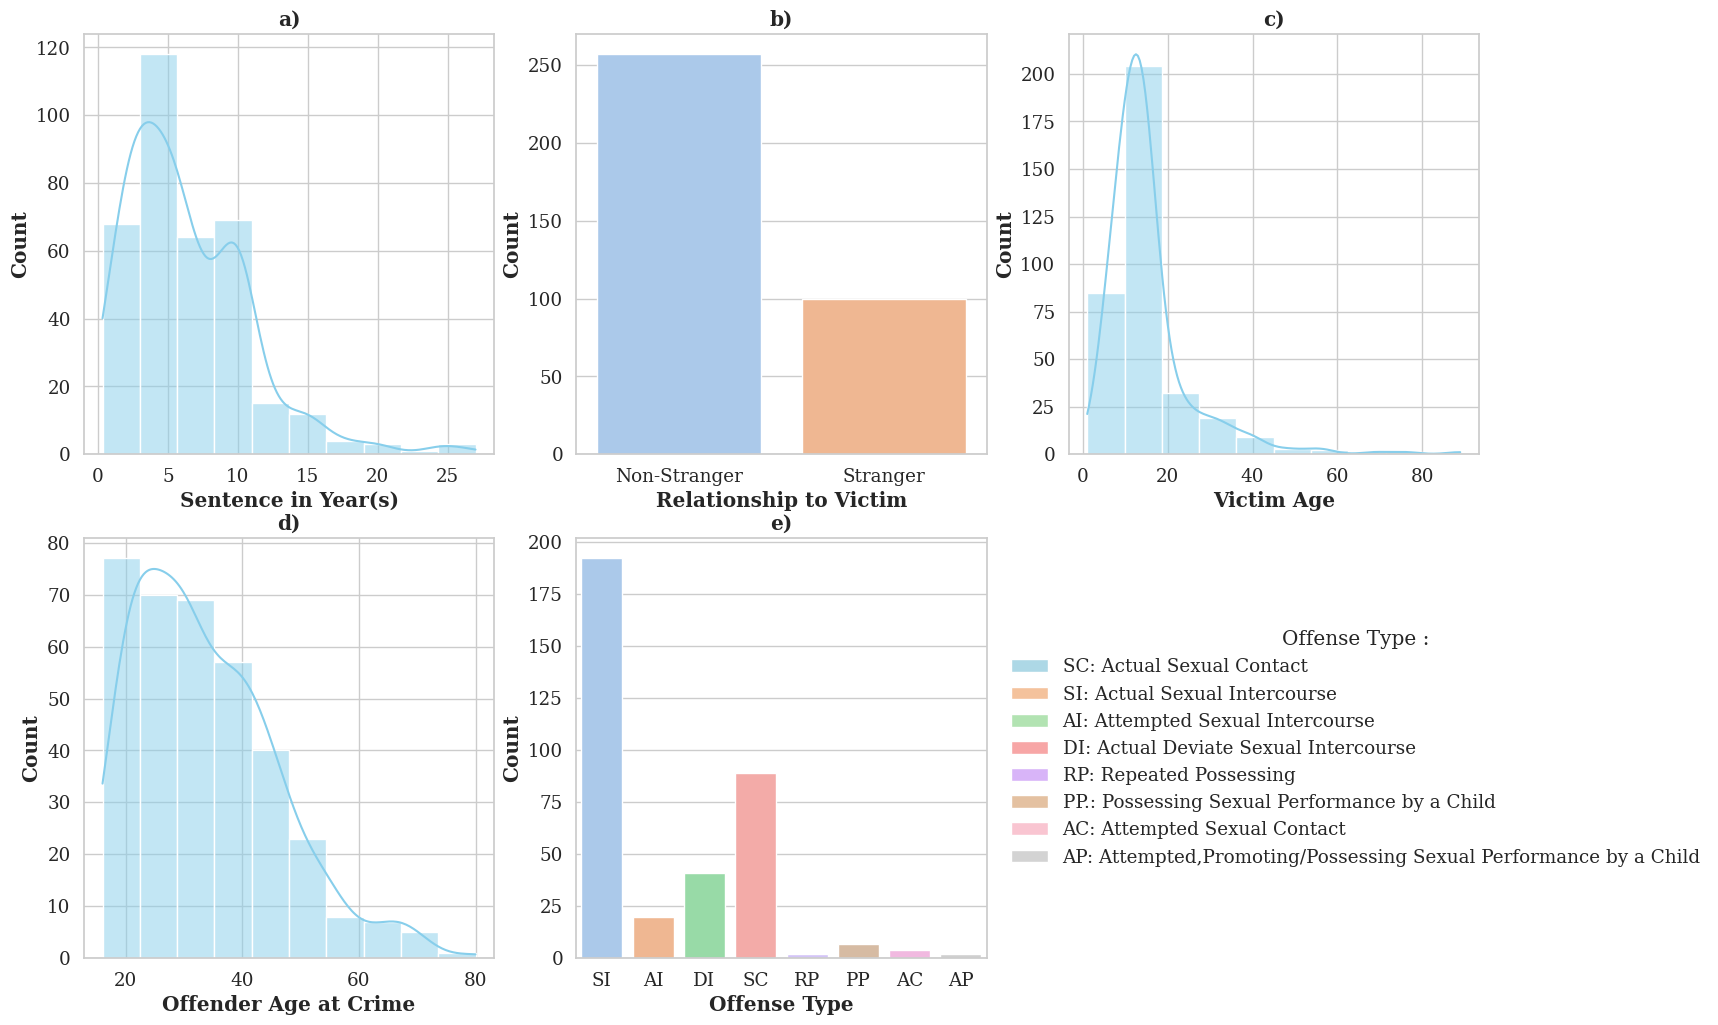

In [124]:
sns.set_theme(style="whitegrid", font_scale=1.2, rc={"axes.labelweight": "bold", "axes.titleweight": "bold", "font.family": "serif"})

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.delaxes(axes[1, 2])  

# Fig a) Distribution of Sentence in Years 
sns.histplot(df_filtered["Sentence in Year(s)"], bins=10, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title("a)", fontweight="bold")
axes[0, 0].set_xlabel("Sentence in Year(s)")
axes[0, 0].set_ylabel("Count")

# Fig b) Relationship to Victim
sns.countplot(x="Relationship to Victim", data=df_filtered, palette="pastel", ax=axes[0, 1])
axes[0, 1].set_title("b)", fontweight="bold")
axes[0, 1].set_xlabel("Relationship to Victim")
axes[0, 1].set_ylabel("Count")

# Fig c) Victim Age 
sns.histplot(df_filtered["Victim Age"], bins=10, kde=True, color="skyblue", ax=axes[0, 2])
axes[0, 2].set_title("c)", fontweight="bold")
axes[0, 2].set_xlabel("Victim Age")
axes[0, 2].set_ylabel("Count")

# Fig d) Offender Age 
sns.histplot(df_filtered["Offender Age at Crime"], bins=10, kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title("d)", fontweight="bold")
axes[1, 0].set_xlabel("Offender Age at Crime")
axes[1, 0].set_ylabel("Count")

# Fig e) Offense Type
sns.countplot(x="Offense Abbrev", data=df_filtered, palette="pastel", ax=axes[1, 1])
axes[1, 1].set_title("e)", fontweight="bold")
axes[1, 1].set_xlabel("Offense Type")
axes[1, 1].set_ylabel("Count")

# Legend of abbreviations
legend_elements = [
    Patch(facecolor='#add8e6', label='SC: Actual Sexual Contact'),                     
    Patch(facecolor='#f4c29c', label='SI: Actual Sexual Intercourse'),                
    Patch(facecolor='#b2e3b2', label='AI: Attempted Sexual Intercourse'),              
    Patch(facecolor='#f7a6a6', label='DI: Actual Deviate Sexual Intercourse'),         
    Patch(facecolor='#d8b4f8', label='RP: Repeated Possessing'),                       
    Patch(facecolor='#e4c1a1', label='PP.: Possessing Sexual Performance by a Child'), 
    Patch(facecolor='#f9c5d1', label='AC: Attempted Sexual Contact'),
    Patch(facecolor='lightgray', label='AP: Attempted,Promoting/Possessing Sexual Performance by a Child')                 
]

axes[1, 1].legend(handles=legend_elements, title="Offense Type :", loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)


## 6 - Data Modeling : Multivariate Linear Regression

We computed the following mixed linear model:

$Sentence_{i} = b_{0} + b_{1} Relationship_{i} + b_{2} Offender\ Age_{i} + b_{3} Victim\ Age_{i} + b_{4} Offense\ Type_{i} + \epsilon_{i}$


In [125]:
model = smf.ols(formula = ' Q("Sentence in Year(s)") ~ Q("Relationship to Victim") + Q("Offender Age at Crime") + Q("Victim Age") + Q("Offense Abbrev")', data = df_filtered).fit()
model.summary()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Q("Sentence in Year(s)")   R-squared:                       0.063
Model:                                  OLS   Adj. R-squared:                  0.036
Method:                       Least Squares   F-statistic:                     2.320
Date:                      Fri, 09 May 2025   Prob (F-statistic):             0.0119
Time:                              15:23:32   Log-Likelihood:                -1028.8
No. Observations:                       357   AIC:                             2080.
Df Residuals:                           346   BIC:                             2122.
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------